# Libraries Imported

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV

# Reading .csv file

In [18]:
dataset = pd.read_csv('braz-mal.csv')
dataset.head()

,TFIDF_mal,TFIDF_good,w2v_good,w2v_mal,max_good,max_mal,ant_good_2,ant_mal_2,w2v_good_mul,w2v_mal_mul,1gram_good,1gram_mal,label,ImportedSymbols
0,0.011219,0.000454,29.181547,33.478297,6,36,1,0,1.410000e-07,0.0001,37,37,1,zwwritefile wcslen rtlupcaseunicodechar zwclos...
1,0.011219,0.000454,29.181547,33.478297,6,36,1,0,1.410000e-07,0.0001,37,37,1,zwwritefile wcslen rtlupcaseunicodechar zwclos...
2,0.011219,0.000454,29.181547,33.478297,6,36,1,0,1.410000e-07,0.0001,37,37,1,zwwritefile wcslen rtlupcaseunicodechar zwclos...
3,0.011219,0.000454,29.181547,33.478297,6,36,1,0,1.410000e-07,0.0001,37,37,1,zwwritefile wcslen rtlupcaseunicodechar zwclos...
4,0.011219,0.000454,29.181547,33.478297,6,36,1,0,1.410000e-07,0.0001,37,37,1,zwwritefile wcslen rtlupcaseunicodechar zwclos...


In [19]:

X = dataset.drop(['label'], axis = 1)
y = dataset['label']
label_encoder = LabelEncoder()

X['ImportedSymbols']=label_encoder.fit_transform(X['ImportedSymbols'])

In [20]:
X.head()

,TFIDF_mal,TFIDF_good,w2v_good,w2v_mal,max_good,max_mal,ant_good_2,ant_mal_2,w2v_good_mul,w2v_mal_mul,1gram_good,1gram_mal,ImportedSymbols
0,0.011219,0.000454,29.181547,33.478297,6,36,1,0,1.410000e-07,0.0001,37,37,18690
1,0.011219,0.000454,29.181547,33.478297,6,36,1,0,1.410000e-07,0.0001,37,37,18690
2,0.011219,0.000454,29.181547,33.478297,6,36,1,0,1.410000e-07,0.0001,37,37,18690
3,0.011219,0.000454,29.181547,33.478297,6,36,1,0,1.410000e-07,0.0001,37,37,18690
4,0.011219,0.000454,29.181547,33.478297,6,36,1,0,1.410000e-07,0.0001,37,37,18690


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle =True, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
X.head()

,TFIDF_mal,TFIDF_good,w2v_good,w2v_mal,max_good,max_mal,ant_good_2,ant_mal_2,w2v_good_mul,w2v_mal_mul,1gram_good,1gram_mal,ImportedSymbols
0,0.011219,0.000454,29.181547,33.478297,6,36,1,0,1.410000e-07,0.0001,37,37,18690
1,0.011219,0.000454,29.181547,33.478297,6,36,1,0,1.410000e-07,0.0001,37,37,18690
2,0.011219,0.000454,29.181547,33.478297,6,36,1,0,1.410000e-07,0.0001,37,37,18690
3,0.011219,0.000454,29.181547,33.478297,6,36,1,0,1.410000e-07,0.0001,37,37,18690
4,0.011219,0.000454,29.181547,33.478297,6,36,1,0,1.410000e-07,0.0001,37,37,18690


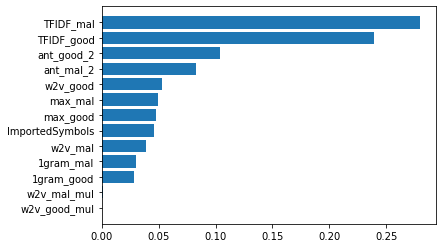

In [23]:
features=['TFIDF_mal','TFIDF_good','w2v_good','w2v_mal','max_good','max_mal','ant_good_2','ant_mal_2','w2v_good_mul','w2v_mal_mul','1gram_good','1gram_mal','ImportedSymbols']

rf = RandomForestRegressor(random_state=0)

rf.fit(X_train,y_train)




f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()


In [24]:
rfe = RFECV(rf,cv=5,scoring="neg_mean_squared_error")

rfe.fit(X_train,y_train)

selected_features = np.array(features)[rfe.get_support()]
print(selected_features)

['TFIDF_mal' 'TFIDF_good' 'w2v_good' 'w2v_mal' 'max_good' 'max_mal'
 'ant_good_2' 'ant_mal_2' '1gram_good' '1gram_mal' 'ImportedSymbols']


In [64]:
clf = MLPClassifier()

param_grid = { 
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,),(50,100,50,100),(50,100,50,100,50),(10,5,10)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

CV_mlpc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5, scoring='accuracy')
CV_mlpc.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,), (50, 100, 50, 100),
                                                (50, 100, 50, 100, 50),
                                                (10, 5, 10)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             scoring='accuracy')

In [65]:
CV_mlpc.best_params_

{'activation': 'tanh',
 'alpha': 0.05,
 'hidden_layer_sizes': (50, 100, 50, 100, 50),
 'learning_rate': 'adaptive',
 'solver': 'sgd'}

Accuracy: 0.8586173320350535
Precision: 0.9394524959742351
Recall: 0.8442836468885673
F1-score: 0.889329268292683

Classification Report:

              precision    recall  f1-score      support
0              0.734975  0.888095  0.804313  1680.000000
1              0.939452  0.844284  0.889329  3455.000000
accuracy       0.858617  0.858617  0.858617     0.858617
macro avg      0.837214  0.866189  0.846821  5135.000000
weighted avg   0.872554  0.858617  0.861515  5135.000000


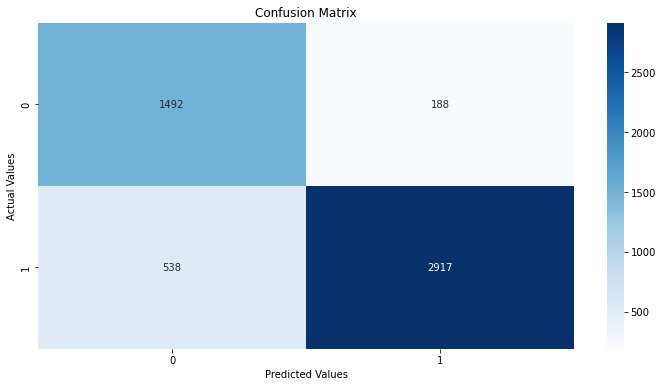

In [21]:
mlpc = MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes= (50, 100,50), learning_rate= 'adaptive', solver= 'sgd',max_iter=300)
mlpc.fit(X_train,y_train)
y_pred = mlpc.predict(X_test)

cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", (2*metrics.precision_score(y_test, y_pred)*metrics.recall_score(y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred)))
print("")

print("Classification Report:\n")
report = classification_report(y_test, y_pred, output_dict = True)
cr = pd.DataFrame(report).transpose()
print(cr)